In [136]:
import pandas as pd
from pathlib import Path
import hvplot.pandas
import plotly.express as px
import os
import seaborn as sns
import panel as pn
import holoviews as hv
%matplotlib inline

In [137]:
dateCols = ['GRADE DATE']
csvpath= Path("zipcode_restaurants_income.csv", parse_dates=dateCols)
pre_covid_db= pd.read_csv(csvpath)
pre_covid_db.head()

,New York,Borough,income_num_returns(households),avg income per return(x1000s),income level,DBA,STREET,CUISINE DESCRIPTION,SCORE,GRADE,GRADE DATE
0,10007,Manhattan,3640,693.379945,high income,MARIACHI'S RESTAURANT,CHAMBERS STREET,Mexican,13,A,1/13/2020
1,10007,Manhattan,3640,693.379945,high income,SPOTIFY - BARISTA BAR,GREENWICH STREET,CafÃ©/Coffee/Tea,13,A,1/22/2020
2,10007,Manhattan,3640,693.379945,high income,STARBUCKS COFFEE COMPANY #29854,GREENWICH STREET,CafÃ©/Coffee/Tea,2,A,1/13/2020
3,10007,Manhattan,3640,693.379945,high income,SPOTIFY - BARISTA BAR,GREENWICH STREET,CafÃ©/Coffee/Tea,13,A,1/22/2020
4,10007,Manhattan,3640,693.379945,high income,CANTEEN,WORLD TRADE CTR,American,12,A,1/23/2020


In [138]:
Pre_restaurants= pre_covid_db.drop(columns=["CUISINE DESCRIPTION", "SCORE", "GRADE"])
Pre_restaurants.head(10)

,New York,Borough,income_num_returns(households),avg income per return(x1000s),income level,DBA,STREET,GRADE DATE
0,10007,Manhattan,3640,693.379945,high income,MARIACHI'S RESTAURANT,CHAMBERS STREET,1/13/2020
1,10007,Manhattan,3640,693.379945,high income,SPOTIFY - BARISTA BAR,GREENWICH STREET,1/22/2020
2,10007,Manhattan,3640,693.379945,high income,STARBUCKS COFFEE COMPANY #29854,GREENWICH STREET,1/13/2020
3,10007,Manhattan,3640,693.379945,high income,SPOTIFY - BARISTA BAR,GREENWICH STREET,1/22/2020
4,10007,Manhattan,3640,693.379945,high income,CANTEEN,WORLD TRADE CTR,1/23/2020
5,10007,Manhattan,3640,693.379945,high income,JOE & THE JUICE GREENWICH ST,GREENWICH STREET,12/30/2019
6,10007,Manhattan,3640,693.379945,high income,BARCLAY STREET CAFE,GREENWICH STREET,1/10/2020
7,10007,Manhattan,3640,693.379945,high income,JOE & THE JUICE GREENWICH ST,GREENWICH STREET,12/30/2019
8,10007,Manhattan,3640,693.379945,high income,LEKKA BURGER,WARREN STREET,1/10/2020
9,10007,Manhattan,3640,693.379945,high income,LEKKA BURGER,WARREN STREET,1/10/2020


In [139]:
#Date_pre_db=Pre_restaurants.set_index(Pre_restaurants['GRADE DATE'])
#Date_pre_db.head()

In [140]:
#sorted_pre_restaurants= Date_pre_db.sort_index(ascending= True)
#sorted_pre_restaurants.head()

In [141]:
#pre_rest_db= sorted_pre_restaurants.loc['01/01/2019':'12/31/2019']
#pre_rest_db.head()

In [142]:
Pre_restaurants.duplicated()

0        False
1        False
2        False
3         True
4        False
5        False
6        False
7         True
8        False
9         True
10        True
11       False
12        True
13        True
14       False
15        True
16        True
17        True
18        True
19       False
20       False
21       False
22        True
23       False
24        True
25        True
26        True
27       False
28       False
29        True
         ...  
15679    False
15680    False
15681    False
15682    False
15683     True
15684    False
15685    False
15686     True
15687     True
15688    False
15689    False
15690     True
15691     True
15692     True
15693     True
15694     True
15695     True
15696     True
15697    False
15698     True
15699     True
15700     True
15701     True
15702     True
15703     True
15704     True
15705     True
15706     True
15707     True
15708     True
Length: 15709, dtype: bool

In [143]:
Pre_restaurants= Pre_restaurants.drop_duplicates().copy()
Pre_restaurants.head()

,New York,Borough,income_num_returns(households),avg income per return(x1000s),income level,DBA,STREET,GRADE DATE
0,10007,Manhattan,3640,693.379945,high income,MARIACHI'S RESTAURANT,CHAMBERS STREET,1/13/2020
1,10007,Manhattan,3640,693.379945,high income,SPOTIFY - BARISTA BAR,GREENWICH STREET,1/22/2020
2,10007,Manhattan,3640,693.379945,high income,STARBUCKS COFFEE COMPANY #29854,GREENWICH STREET,1/13/2020
4,10007,Manhattan,3640,693.379945,high income,CANTEEN,WORLD TRADE CTR,1/23/2020
5,10007,Manhattan,3640,693.379945,high income,JOE & THE JUICE GREENWICH ST,GREENWICH STREET,12/30/2019


In [144]:
Pre_restaurants['DBA'].duplicated()

0        False
1        False
2        False
4        False
5        False
6        False
8        False
11       False
14       False
19       False
20       False
21       False
23       False
27       False
28       False
31       False
32       False
33       False
35       False
37       False
44       False
45       False
46       False
47       False
48       False
49       False
50       False
51       False
58       False
59       False
         ...  
15623    False
15624     True
15625     True
15627     True
15636     True
15639     True
15643     True
15645    False
15646     True
15648    False
15649     True
15650     True
15651     True
15652     True
15654     True
15658     True
15660     True
15665    False
15666    False
15667     True
15677     True
15679     True
15680     True
15681    False
15682     True
15684     True
15685    False
15688     True
15689     True
15697     True
Name: DBA, Length: 6486, dtype: bool

## Looking at our duplicates in our restaurant name column, We can infer that the majority of fast food restaurants are in low income neighborhoods

In [145]:
Pre_restaurants['New York'].count()

6486

In [146]:
per_income= Pre_restaurants['income level'].value_counts()
per_income

high income      3377
medium income    1772
low income       1337
Name: income level, dtype: int64

In [147]:
per_zip= Pre_restaurants['New York'].value_counts()
per_zip.head()

10013    742
10022    607
10017    507
11101    412
10009    394
Name: New York, dtype: int64

In [148]:
per_borough= Pre_restaurants["Borough"].value_counts()
per_borough

Manhattan        3780
Queens           1203
Bronx            1077
Brooklyn          326
Staten Island     100
Name: Borough, dtype: int64

In [149]:
# plotting

Pre_restaurants["Borough"].value_counts().hvplot.bar(xlabel= 'Borough', ylabel= 'Number of Restaurants', label='Restaurants per Borough- 3/16/19- 8/6/19')

:Bars   [index]   (Borough)

In [150]:
Pre_restaurants['income level'].value_counts().hvplot.bar(label= "Number of Restaurants in different Socio-Economic Areas, 3/16/19- 8/6/19", xlabel= "Income Bracket", ylabel= " # of Restaurants")

:Bars   [index]   (income level)

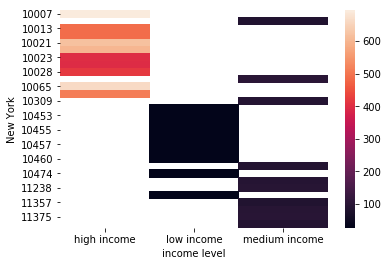

In [161]:
heatmap1_data = pd.pivot_table(Pre_restaurants,values= "avg income per return(x1000s)",
                     index=['New York'], 
                     columns='income level')
sns.heatmap(heatmap1_data)

In [152]:
Pre_restaurants.hvplot.scatter()

:NdOverlay   [Variable]
   :Scatter   [index]   (value)

In [158]:
bars=hv.Bars(per_zip )
bars

:Bars   [index]   (New York)

In [162]:
Pre_restaurants.to_csv("Pre_restaurants.csv")
